In [46]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn as sns

In [246]:
data = h5py.File("/home/samani/Documents/projects/master_project/model/results/model_7/phage4.h5", "a")
print(data.keys())

<KeysViewHDF5 ['agent', 'cost', 'initial_conditions', 'simulation_results', 'target', 'time']>


In [248]:
ag = data["agent"][:]
target = data['target'][0,: , :]
print(target.shape)

(50, 50)


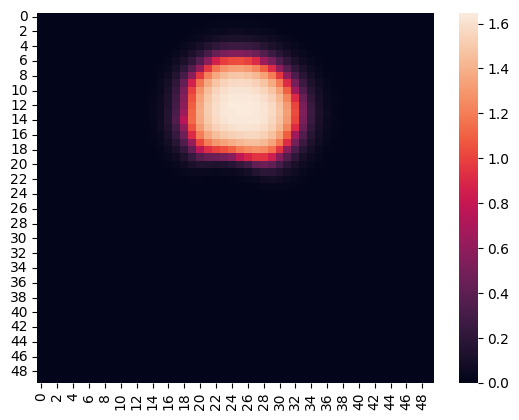

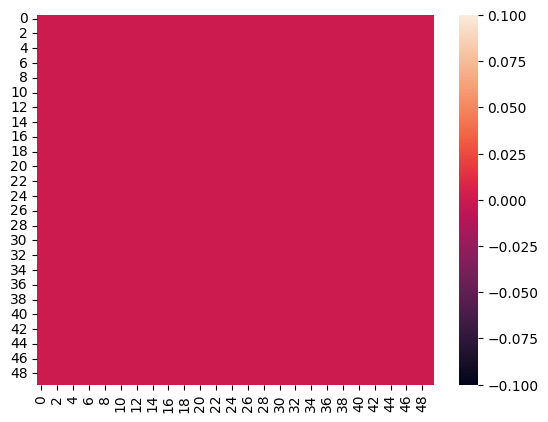

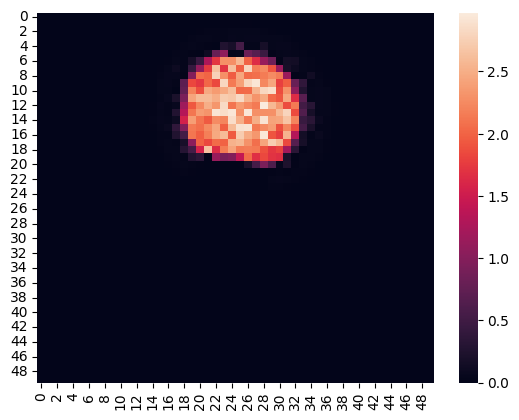

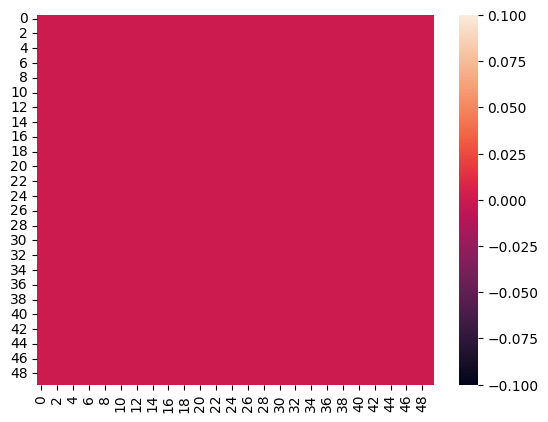

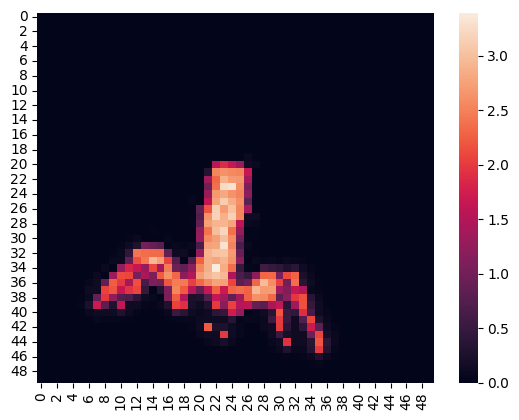

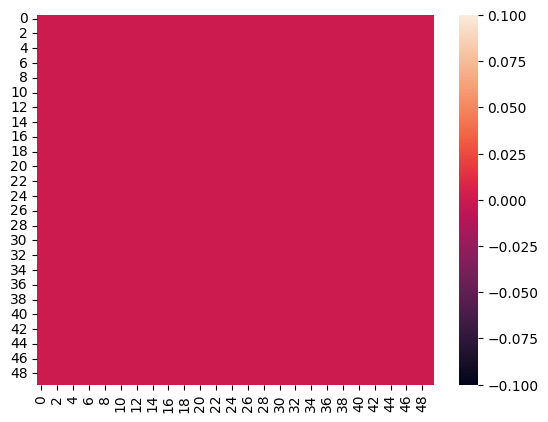

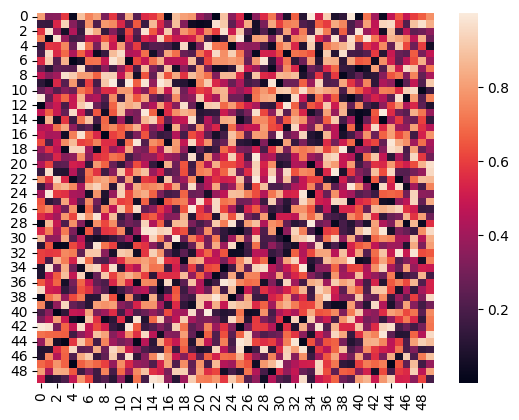

[0.59714389 0.73987538 0.58315837]
[0.6079278  1.29065907 0.17853166]
[ 1.16178906 -0.19401102  1.46979666]
[ 0.39563474  0.60965037  0.97370553 -0.0644522 ]
[0.33796304 0.55260563 0.3539038  0.45781755]
[0.09566922 0.47317606 0.3716341  0.98209357]
[  3.    3.  100.   10.    0.1]


In [256]:
sns.heatmap(target)
plt.show()
sns.heatmap(ag[0])
plt.show()
sns.heatmap(ag[1])
plt.show()
sns.heatmap(ag[2])
plt.show()
sns.heatmap(ag[3])
plt.show()
sns.heatmap(ag[4])
plt.show()
sns.heatmap(ag[5])
plt.show()
print(ag[-1, 0, :3])
print(ag[-1, 2, :3])
print(ag[-1, 4, :3])
print(ag[-2, 1, :4])
print(ag[-4, 1, :4])
print(ag[-6, 1, :4])
print(ag[-1, -1, :5])

In [257]:
costs = []
init = []
res_ = []
time_ = []

In [258]:
for i in range(1, 5):
    data = h5py.File(f"/home/samani/Documents/projects/master_project/model/results/model_7/phage{i}.h5", "a")
    costs.append(data["cost"][:])
    init.append(data['initial_conditions'][:])
    res_.append(data['simulation_results'][:])
    time_.append(data['time'][:])

<Axes: >

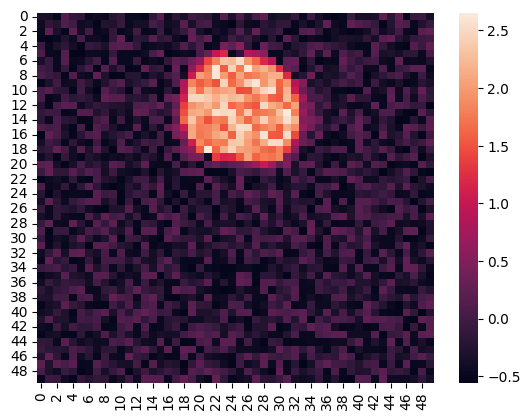

In [275]:
sns.heatmap(init[0][0, -1, :, :])

In [274]:
print(init[0].shape)

(2, 20, 50, 50)


In [259]:
c = 0
for i in range(len(costs)):
    c += len(costs[i])

In [260]:
print(c)

85


In [218]:
cv = []

for i in costs:
    cc = []
    j = 0
    for h in i:
        if j % 2 == 0:
            cc.append(float(h))
        j += 1
    cv.append(cc)   

/tmp/ipykernel_7374/310298551.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cc.append(float(h))


In [262]:
cost_ = []
for c in costs:
    for i in c:
        cost_.append(i)

In [266]:
cost_ = np.array(cost_)
print(cost_)
print(cost_.shape)

[[1.76907755 1.08083123]
 [1.19313472 1.00991938]
 [1.07490758 0.9796665 ]
 [1.0354849  0.95919767]
 [1.0188765  0.93449951]
 [1.00994717 0.89772321]
 [0.99460846 0.85096665]
 [0.97160305 0.79214843]
 [0.93745306 0.73734229]
 [0.88985701 0.6804996 ]
 [0.83736713 0.63144799]
 [0.77953041 0.58212712]
 [0.72817946 0.5373738 ]
 [0.6805226  0.49360532]
 [0.64195257 0.45363897]
 [0.60760394 0.41227846]
 [0.57919048 0.36629071]
 [0.55360423 0.31068259]
 [0.5303869  0.24874903]
 [0.50863415 0.18478251]
 [0.48697969 0.13182436]
 [0.32733648 0.06034556]
 [0.13541732 0.05849127]
 [0.07622046 0.05538288]
 [0.08182665 0.0457235 ]
 [0.06383638 0.03509779]
 [0.03528928 0.02787218]
 [0.01737816 0.02486029]
 [0.01518811 0.02194039]
 [0.02125904 0.02031634]
 [0.02608522 0.01664235]
 [0.07863268 0.03321969]
 [0.0206943  0.01234037]
 [0.01319572 0.01055386]
 [0.01266932 0.00951266]
 [0.0109498  0.00863024]
 [0.01056112 0.00858933]
 [0.01023856 0.00854467]
 [0.00988608 0.0085109 ]
 [0.00959705 0.00847293]


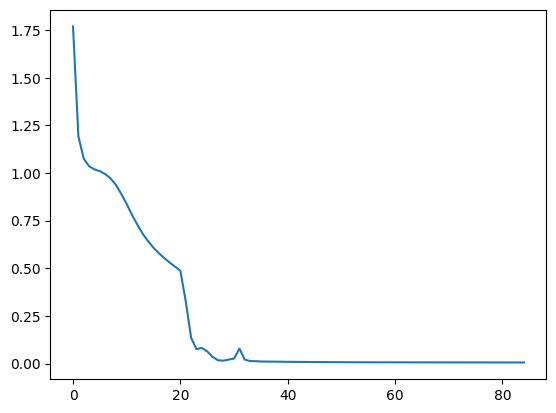

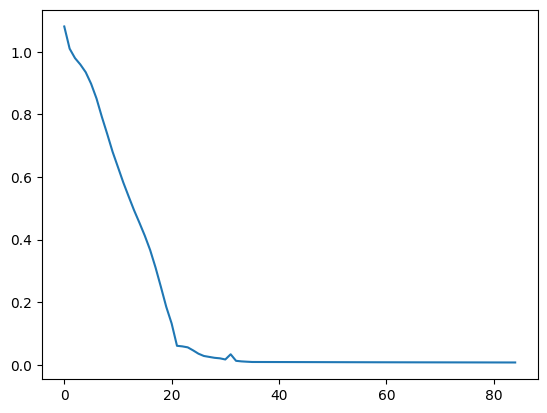

In [267]:
plt.plot(cost_[:, 0])
plt.show()
plt.plot(cost_[:, 1])

In [277]:
for i in costs:
    print(len(i))
for i in res_:
    print(i.shape)
for i in init:
    print(i.shape)

20
10
5
50
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 50, 50, 50)
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 20, 50, 50)
(2, 50, 50, 50)


In [278]:
# 235
init_ = np.zeros((2, 85, 50, 50))
sim_ = np.zeros((2, 85, 50, 50))
init_[:, :20, :, :] = init[0][:, :20, :, : ]
init_[:, 20:30, :, :] = init[1][:, :10, :, : ]
init_[:, 30:35, :, :] = init[2][:, :5, :, : ]
init_[:, 35:, :, :] = init[3][:, :, :, : ]
#init_[100:, :, :] = init[4][0]

sim_[:, :20, :, :] = res_[0][:, :20, :, : ]
sim_[:, 20:30, :, :] = res_[1][:, :10, :, : ]
sim_[:, 30:35, :, :]  = res_[2][:, :5, :, : ]
sim_[:, 35:, :, :]  = res_[3][:, :, :, : ]
#sim_[100:, :, :] = res_[4][0]




<Axes: >

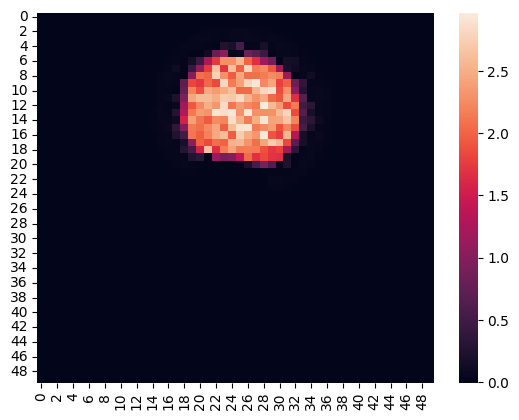

In [283]:
#sns.heatmap(init_[-1])
#plt.show()
sns.heatmap(init_[0, -1])

In [284]:
print(time_)

[array([ 756.82019782,  772.30266571,  763.58700633,  758.31788898,
       3051.49126577]), array([718.56187487, 726.85866022]), array([752.4334147]), array([ 727.0062387 ,  740.60486674,  737.15432072,  727.3550663 ,
        717.40443587,  713.08554268,  704.2229166 ,  695.63117743,
        691.48986506,  690.38575435, 7144.36340642])]


In [287]:
time = 3051.49126577 + 7144.36340642 + 752.4334147 + 718.56187487 + 726.85866022 - 2000

In [288]:
print(time)

10393.708621979998


In [289]:
times = np.array(time)

In [290]:
print(time)

10393.708621979998


In [291]:
with h5py.File('data.h5', 'w') as hdf_file:
    
    hdf_file.create_dataset('time', data=times)
    hdf_file.create_dataset('initial_conditions', data=init_)
    hdf_file.create_dataset('simulation_results', data=sim_)
    hdf_file.create_dataset('agent', data=ag)
    hdf_file.create_dataset('target', data=target)
    hdf_file.create_dataset('cost', data=cost_)   